## Aufgabe 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
np.random.seed(0)

# gleichverteilte Zufallszahlen von 0 bis 1
random = np.random.uniform(0, 1, 1000)

### a.)

In [3]:
# untere Grenze
x_min = -100

# obere Grenze
x_max = 100

random_x_min_max = (x_max - x_min) * random + x_min

print(max(random_x_min_max))

99.96171562339308


### b.)

In [4]:
tau = 1
# Exponentialgesetz
def exp_gesetz(tau, t):
    return tau * np.exp(-t / tau)

# Transformation der gleichverteilten Zufallszahlen
def random_exp_gesetz(u):
    return -tau *  np.log(1 - u)

random_exp_gesetz = random_exp_gesetz(random)

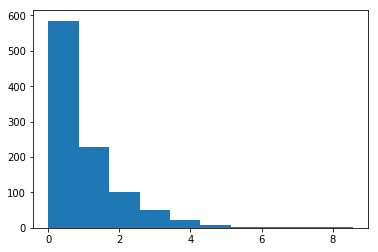

In [5]:
plt.hist(random_exp_gesetz);

### c.)

$$f(x) = N\cdot x^{-n}$$

$$F(x_{max}, x_{min}) = \int_{x_{min}}^{x_{max}} f(x)\; \text{d}x = \frac{N}{1 - n}\left(x_{max}^{(1 - n)}- x_{min}^{(1 - n)}\right) \stackrel{!}{=} 1$$

$$\Leftrightarrow N = \frac{1 - n}{x_{max}^{(1 - n)} - x_{min}^{(1 - n)}}$$

$$F(x, x_{min}) = \frac{N}{1 - n}\left(x^{(1 - n)} - x_{min}^{(1 - n)}\right) \stackrel{!}{=} u$$

$$\Leftrightarrow x = \sqrt[1-n]{\frac{1 - n}{N}u - x_{min}^{(1 - n)}}$$

33.33758769587505


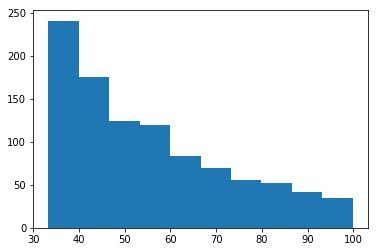

In [6]:
n = 2

N = (1 - n) / (x_max**(1 - n) - x_min**(1-n))

x_potenzgesetz = ((1 - n) / N * random - x_min**(1-n))**(1 / (1 - n))

plt.hist(x_potenzgesetz[(x_potenzgesetz > -10) & (x_potenzgesetz < 100)]);
print(min(x_potenzgesetz))

### d.)

$$\int f(x) \text{d}x = \frac{1}{\pi}\,\arctan{(x)}$$

$$F(x) = \int_{-\infty}^x f(x')\text{d}x' = \frac{1}{\pi}(\arctan{(x)} + \frac{\pi}{2}) \stackrel{!}{=} u$$

$$\Leftrightarrow x = \tan{\left(\pi\left[u + \frac{1}{2}\right]\right)} $$

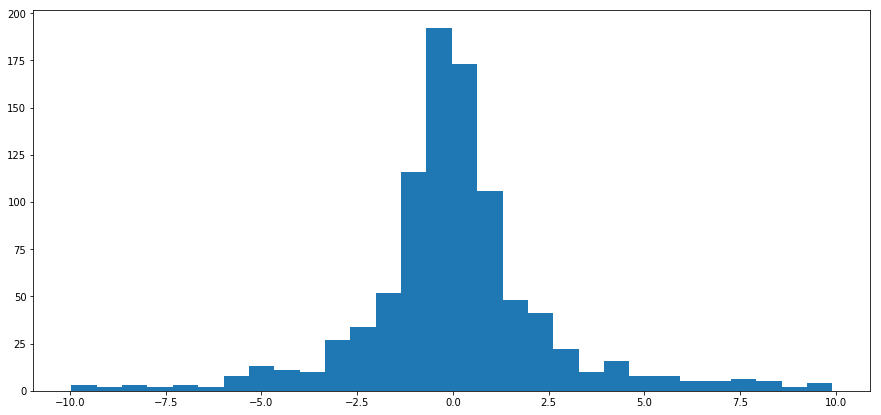

In [7]:
x_cauchy = np.tan(np.pi*(random - 1 / 2))
plt.figure(figsize = [15, 7])
plt.hist(x_cauchy[(x_cauchy >-10) & (x_cauchy<10)], bins=30);

### e.)

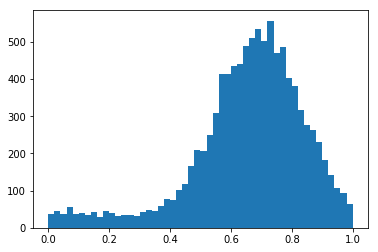

In [8]:
data = np.load("empirisches_histogramm.npy")
plt.hist(data['bin_mid'], bins = np.linspace(0, 1, 51), weights = data['hist'])
plt.show()

# Gleichverteilung zum Abschätzen der histogrammierten Verteilung
n_anzahl = 100000
random_xy = np.array([np.sort(np.round(np.random.uniform(min(data['bin_mid']), max(data['bin_mid']), n_anzahl), 2)),
                     np.round(np.random.uniform(min(data['hist']), max(data['hist']), n_anzahl))])

data_xy = np.array([np.round(data['bin_mid'], 2), np.round(data['hist'])])

random_x = random_xy[0]
random_y = random_xy[1]
verteilung_x = []
verteilung_y = []

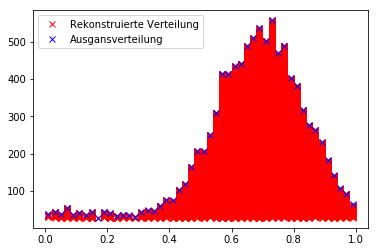

In [9]:
for i in np.flip(range(n_anzahl)):
    for n in range(len(data_xy[0])):
        if random_x[i] == data_xy[0, n] and random_y[i] <= data_xy[1, n]:
            verteilung_x.append(random_x[i])
            verteilung_y.append(random_y[i])

plt.plot(verteilung_x, verteilung_y, 'rx', label = 'Rekonstruierte Verteilung');
plt.plot(data['bin_mid'], data['hist'], 'bx', label = 'Ausgansverteilung');
plt.legend(loc = 'best')
plt.show()

## Aufgabe 6

$x_n = (a\cdot x_{n-1} + b) \mod m$

### a.)

256
1


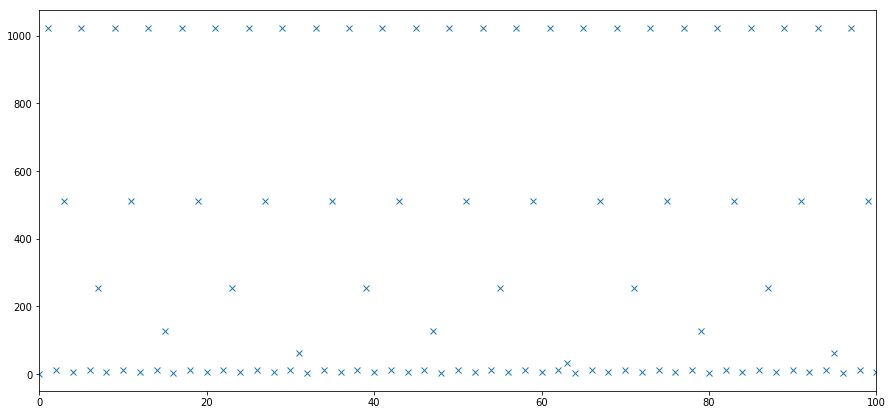

In [12]:
def LCG(a, b, m, x_0):
    x_0.append((a * x_0[0] + b) % m)
    while not(x_0[len(x_0) - 1] in x_0[0:len(x_0) - 1]):
        x_0.append((a * x_0[len(x_0) - 1] + b) % m)
    return x_0[0:len(x_0) - 1]

b_a = 3
m_a = 1024

# Liste für die Periodenlängen der Zufallszahlen für verschiedene a Werte
len_random_LCG = []

for a_a in range(m_a):
    len_random_LCG.append(len(LCG(a_a, b_a, m_a, x_0 = [0])))

max_LCG = len_random_LCG.index(max(len_random_LCG))
print(len_random_LCG.count(max(len_random_LCG)))
print(max_LCG)

plt.figure(figsize = [15, 7]);
plt.plot(range(m_a), len_random_LCG, "x");
plt.xlim(0,100);

### b.)

In [ ]:
a = 1601
b = 3456
m = 10000

list_LCG = LCG(a, b, m, x_0 = [0])

while len(list_LCG) < m:
    list_LCG.extend(LCG(a, b, m, x_0 = [0]))
    
plt.figure(figsize = [15, 7])
plt.hist(list_LCG, bins = 50);    

### c.)

In [ ]:
plt.figure(figsize = [15, 15])
plt.scatter(list_LCG[::2], list_LCG[1::2]);

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
list_3d_plot = list_LCG

if (len(list_LCG) % 3) != 0:
    list_3d_plot.pop()

fig = plt.figure(figsize = [15, 15])
ax = Axes3D(fig)
ax. view_init(45 , 30)

sequence_containing_x_vals = list(range(0, 100))
sequence_containing_y_vals = list(range(0, 100))
sequence_containing_z_vals = list(range(0, 100))

ax.scatter(list_3d_plot[::3], list_3d_plot[1::3], list_3d_plot[2::3]);

### d.)

Histogramme mit Zufallszahlen aus der numpy Funkiton numpy.random.unifofrm().

In [ ]:
random_number = np.random.uniform(0, max(list_LCG), 10000)

plt.hist(random_number, bins = 50);

In [ ]:
plt.figure(figsize = [15, 15])
plt.scatter(random_number[::2], random_number[1::2]);

In [ ]:
if (len(random_number) % 3) != 0:
    random_number = np.delete(random_number, len(random_number) - 1)

fig = plt.figure(figsize = [15, 15])
ax = Axes3D(fig)
ax. view_init(45 , 30)

sequence_containing_x_vals = list(range(0, 100))
sequence_containing_y_vals = list(range(0, 100))
sequence_containing_z_vals = list(range(0, 100))

ax.scatter(random_number[::3], random_number[1::3], random_number[2::3]);

### e.)

In [ ]:
for startwert in np.linspace(0.5, 200 + 0.5, 400 + 1):
    print(startwert, LCG(a, b_a, m_a, [startwert]).count(1 / 2))

## Aufgabe 7
Zweidimensionale Gaußverteilung mit $$\mu_x = 4$$

$$\mu_y = 2$$

$$\sigma_x = 1,5$$

$$\text{Cov}(x,y)$$
### a.)

In [ ]:
mu_x = 4
mu_y = 2
sigma_x = 3.5
sigma_y = 1.5
cov_x_y = 4.2

roh_x_y = cov_x_y / (sigma_x * sigma_y)

print('Korrelationskoeffizient: ', roh_x_y)

### b.)

In [ ]:
mean = [mu_x, mu_y]
cov = [[sigma_x**2, cov_x_y],
      [cov_x_y, sigma_y**2]]

plt.figure(figsize = [15, 10]);
gauss_2d = np.random.multivariate_normal(mean, cov, 15000)

def gauss(x,y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x **2) + (y - mu_y)**2 / (2 * sigma_y **2)))

gauss_values = gauss(gauss_2d[:, 0], gauss_2d[:, 1])

konst_05 = gauss_2d[np.round(gauss_values, 2) == 0.58]
konst_08 = gauss_2d[np.round(gauss_values, 2) == 0.78]
konst_e = gauss_2d[np.round(gauss_values, 2) == np.round(1 / np.sqrt(np.e), 2)]

plt.scatter(gauss_2d[:, 0], gauss_2d[:, 1], s=3, alpha=0.5);
#plt.scatter(konst_05[:, 0], konst_05[:, 1], s=10, alpha=1, color = 'k');
#plt.scatter(konst_08[:, 0], konst_08[:, 1], s=10, alpha=1, color = 'r', label = "");
plt.scatter(konst_e[:, 0], konst_e[:, 1], s=10, alpha=1, color = 'r', label = "");